In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

### Кривая намагничивания

In [30]:
data = pd.read_csv("amp_by_current_and_voltage.csv")
data

,voltage[V],current[A],amp[muV]
0,0.0,0.00,-2.2
1,0.5,0.05,-3.5
2,1.0,0.09,-3.2
3,1.5,0.14,-3.8
4,1.9,0.18,-5.8
...,...,...,...
106,-25.5,1.87,149.2
107,-26.1,1.89,150.3
108,-26.5,1.92,152.5
109,-27.1,1.94,153.1


In [51]:
x_dots = -np.sign(data['voltage[V]']) * data['current[A]']
y_dots = data['amp[muV]']          
order = np.argsort(x_dots)
x_dots, y_dots = x_dots[order], y_dots[order]
interpolation = interpolate.UnivariateSpline(x_dots,
                                             y_dots,
                                              s = 10)
x_line = np.linspace(-3, 3, 1000)
y_interp = interpolation(x_line)

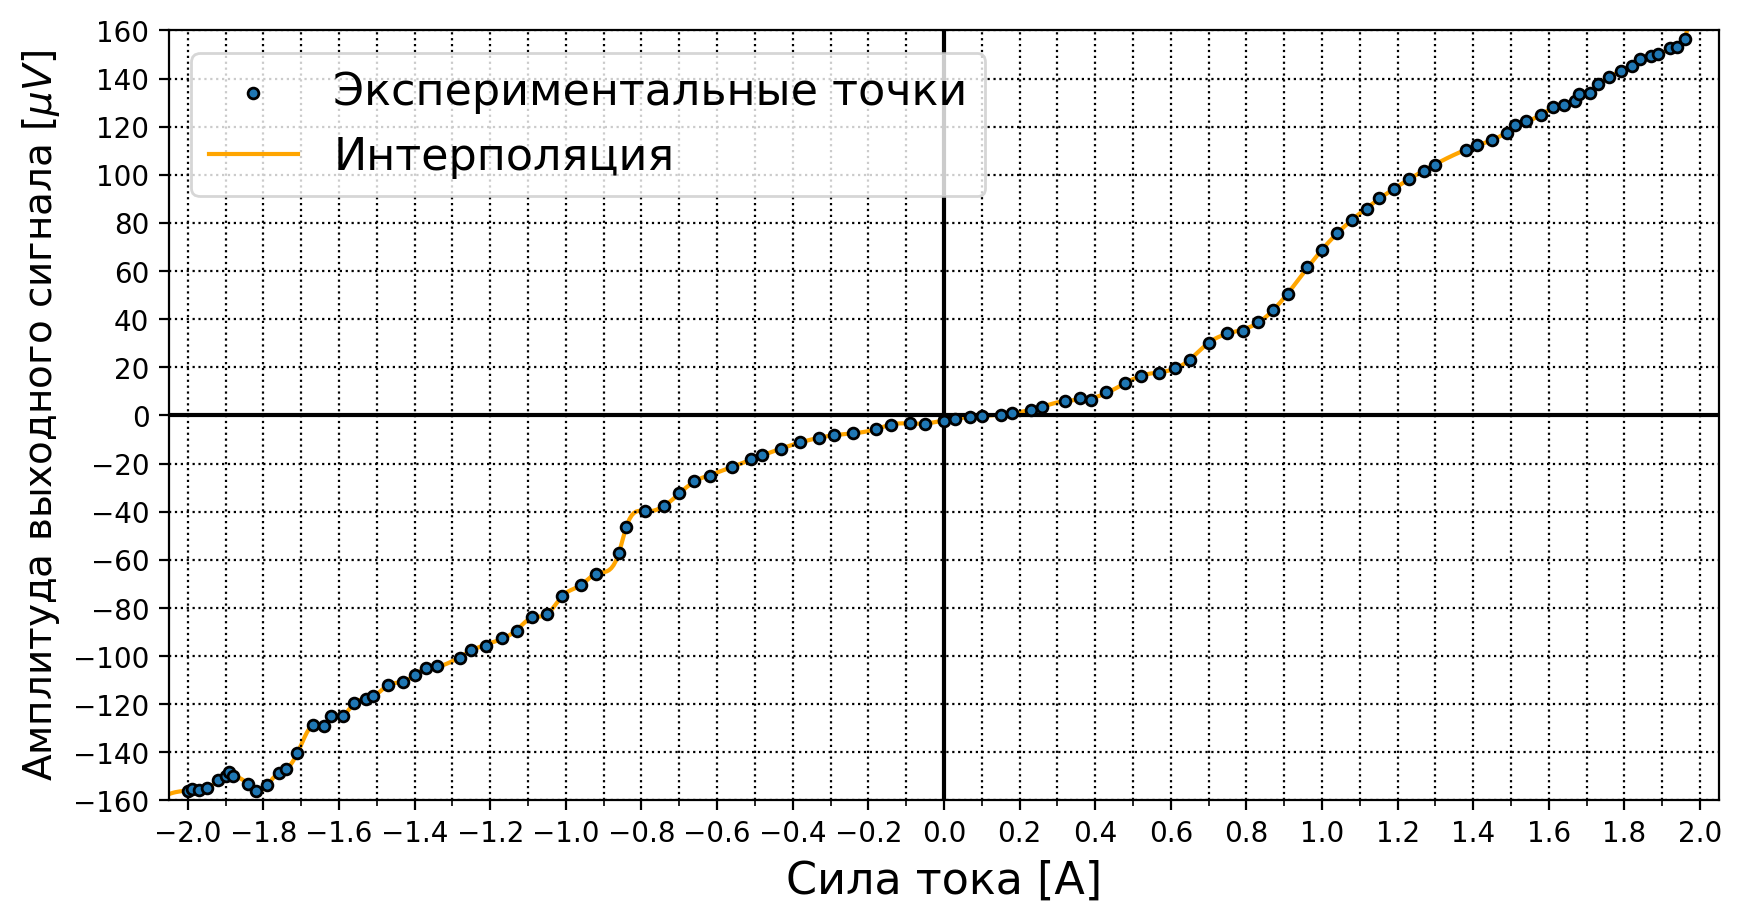

In [58]:
plt.figure(figsize = (10, 5), dpi = 200)
plt.axvline(0, color = 'black')
plt.axhline(0, color = 'black')
plt.scatter(x_dots, y_dots, edgecolors='black', s = 15, zorder = 10, label = 'Экспериментальные точки')
plt.xlabel("Сила тока [А]", fontsize = 16)
plt.ylabel(r"Амплитуда выходного сигнала [$\mu V$]", fontsize = 14)
plt.plot(x_line, y_interp, color = 'orange', zorder = 1, label = 'Интерполяция')
plt.xticks(np.arange(-2, 2.1, 0.1), minor = True)
plt.xticks(np.arange(-2, 2.2, 0.2))
plt.yticks(np.arange(-160, 200, 20))
plt.ylim(-160, 160)
plt.xlim(-2.05, 2.05)
plt.grid(which = 'both', color = 'black', ls = ':')
plt.legend(fontsize = 16)

### Амплитуда от частоты

Text(0.5, 1.0, 'Подбор оптимальной частоты')

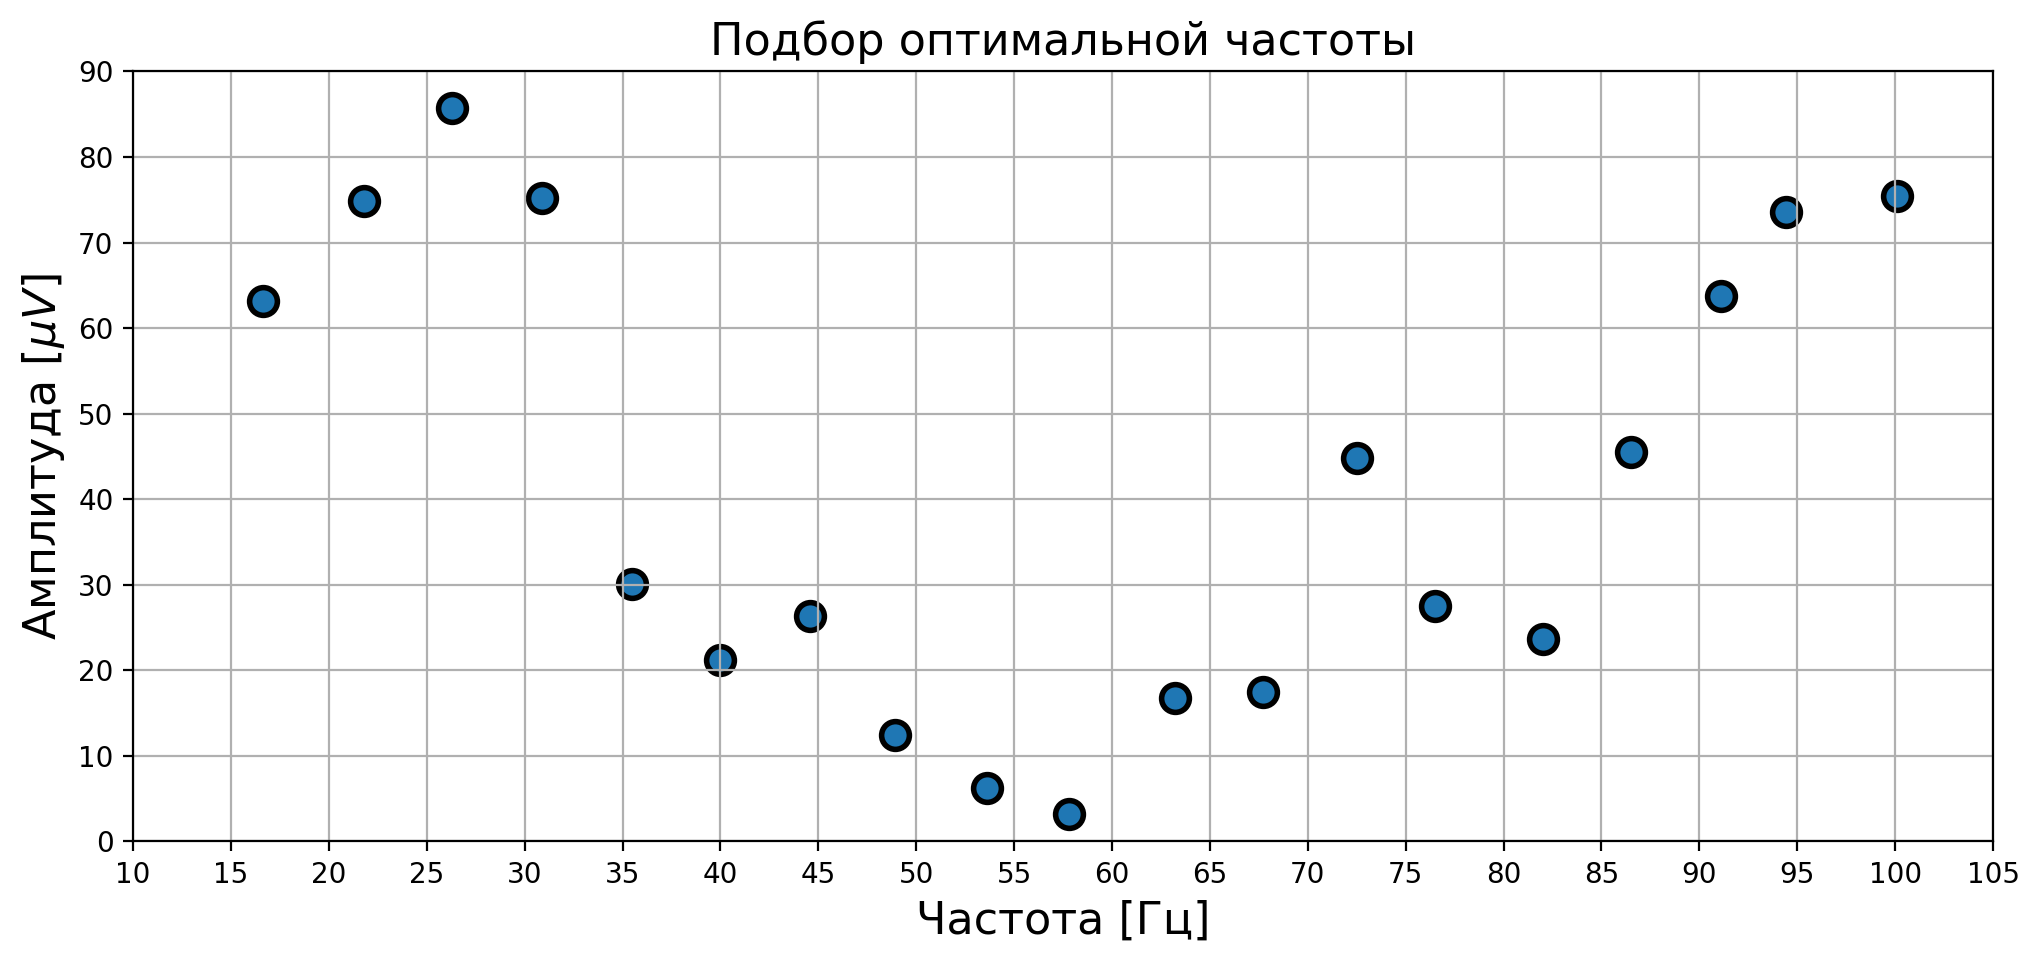

In [27]:
data = pd.read_csv("amp_by_freq.csv")


plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(data['freq[Hz]'], np.abs(data['amp[muV]']), s = 100, edgecolors='black', linewidths=2)
plt.xlabel(r"Частота [Гц]", fontsize = 16)
plt.ylabel(r"Амплитуда [$\mu V$]", fontsize = 16)
plt.xticks(np.arange(10, 200, 5))
plt.grid()
plt.xlim(10, 105)
plt.ylim(0, 90)
plt.title("Подбор оптимальной частоты", fontsize = 16)